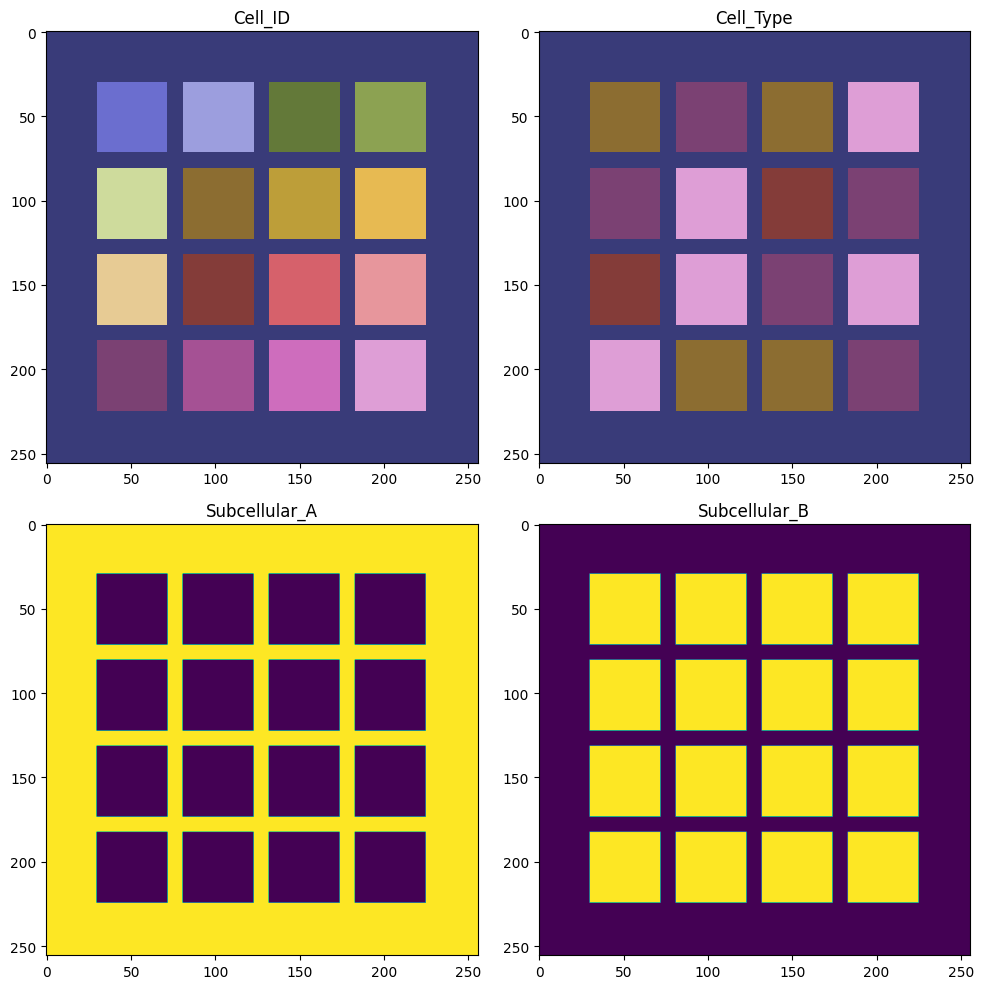

In [8]:
import torch
from multiomicscellsim.torch_cpm.config import TorchCPMConfig, TorchCPMCellType
from multiomicscellsim.patterns.config import RDPatternLibrary
from multiomicscellsim.torch_cpm.simulation import TorchCPM

import matplotlib.pyplot as plt

size = 256

adhesion_matrix = torch.tensor([[ 0.0, 1.0, 4.0, 5.0],
                                [ 1.0, 0.0, 1.0, 1.0],
                                [ 2.0, 1.0, 0.0, 1.0],
                                [ 5.0, 1.0, 1.0, 0.0]])
                                 
# Define some cell types

cell_types = [
    TorchCPMCellType(id=1,
                     name="A",
                     background_adhesion=10.0,
                     cells_adhesion=adhesion_matrix[0],
                     preferred_volume=int(0.4*size**2),
                     preferred_local_perimeter=4.0,
                     # RDPatternConfig contains f, k, D_a, D_b params)
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_index(1),
    ),
    TorchCPMCellType(id=2,
                     name="B",
                     background_adhesion=10.0,
                     cells_adhesion=adhesion_matrix[1],
                     preferred_volume=int(0.2*size**2),
                     preferred_local_perimeter=4.0,
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_index(2),
    ),
    TorchCPMCellType(id=3,
                     name="C",
                     background_adhesion=10.0,
                     cells_adhesion=adhesion_matrix[2],
                     preferred_volume=int(0.2*size**2),
                     preferred_local_perimeter=6.0,
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_index(3),
    ),
    TorchCPMCellType(id=4,
                     name="D",
                     background_adhesion=10.0,
                     cells_adhesion=adhesion_matrix[3],
                     preferred_volume=int(0.2*size**2),
                     preferred_local_perimeter=3.0,
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_index(4),
    )
]

# Define the global simulation parameters

cpm_config = TorchCPMConfig(
    size=size,
    frontier_probability=0.1,
    temperature=1.0,
    cell_types=cell_types,
    lambda_volume=10.0,
    lambda_perimeter=10.0,
    run_rd_every=5,
    rd_steps=10000,    
)

# Create the simulation object
cpm = TorchCPM(cpm_config)


# Setup an initial state
# Draw a 5x5 grid of cells using random cell types
for x in range(5):
    for y in range(5):
        cpm.draw_cell(x=size//5*x, 
                      y=size//5*y, 
                      cell_type=torch.randint(1, len(cell_types)+1, (1,)), 
                      size=size // 12)
cpm.plot_grid()
# FIXME: Something's going on with the pasting of the subcellular structures (see output)
simulation = cpm.yield_step(500)


  0%|          | 0/500 [00:00<?, ?it/s]

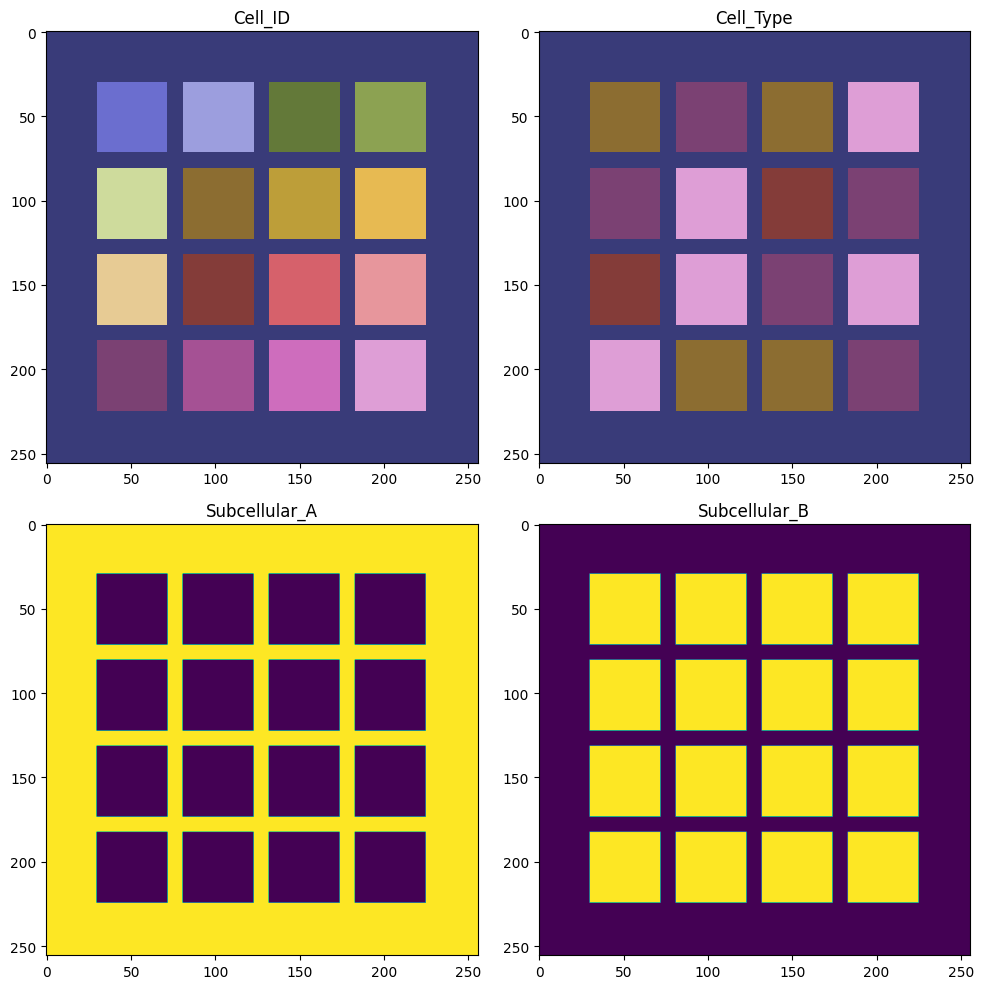

  6%|▌         | 30/500 [00:48<08:24,  1.07s/it] 

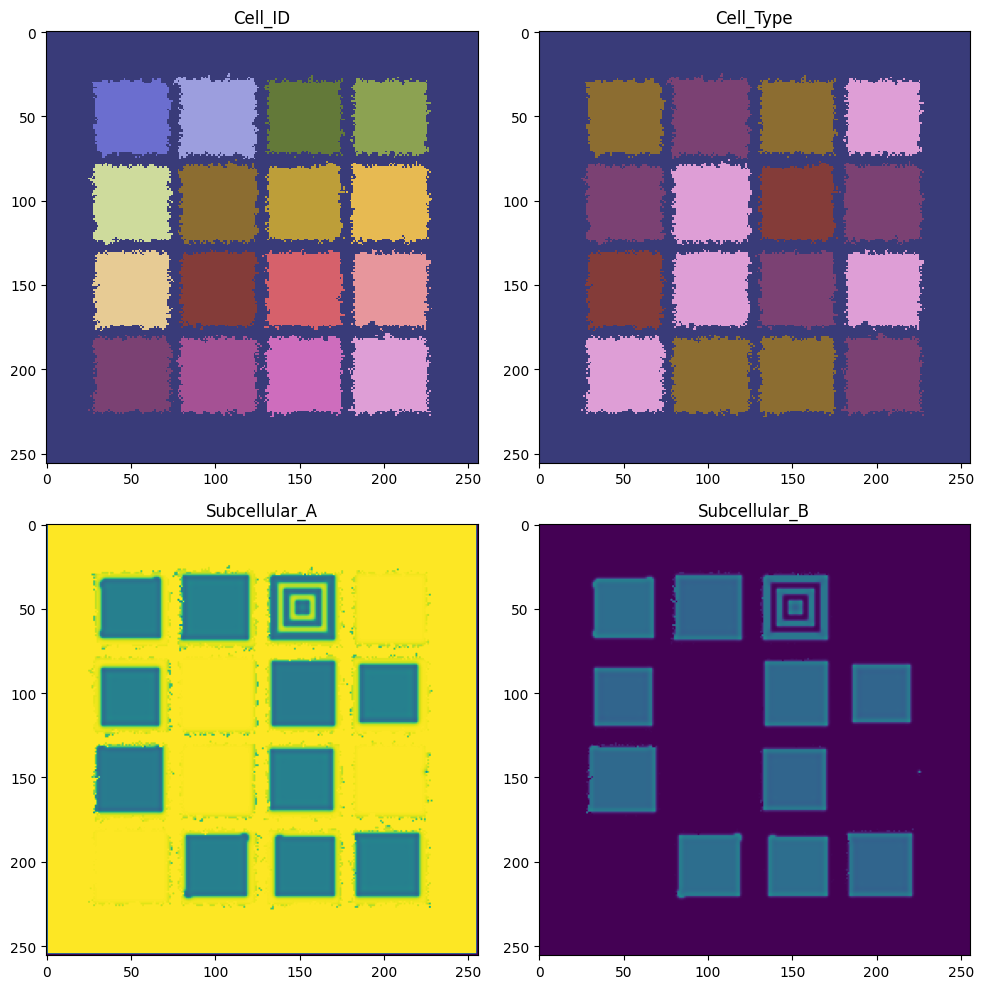

 12%|█▏        | 60/500 [01:38<08:13,  1.12s/it]

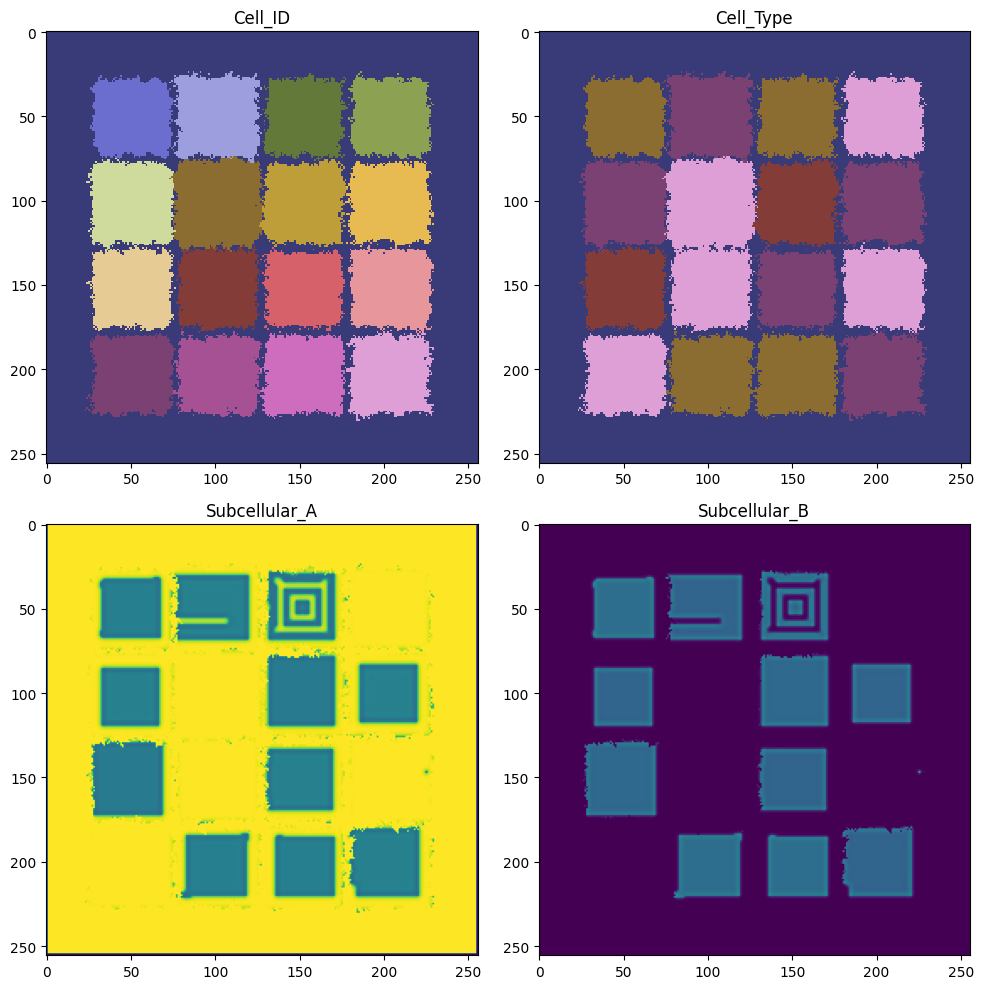

 18%|█▊        | 90/500 [02:30<07:52,  1.15s/it]

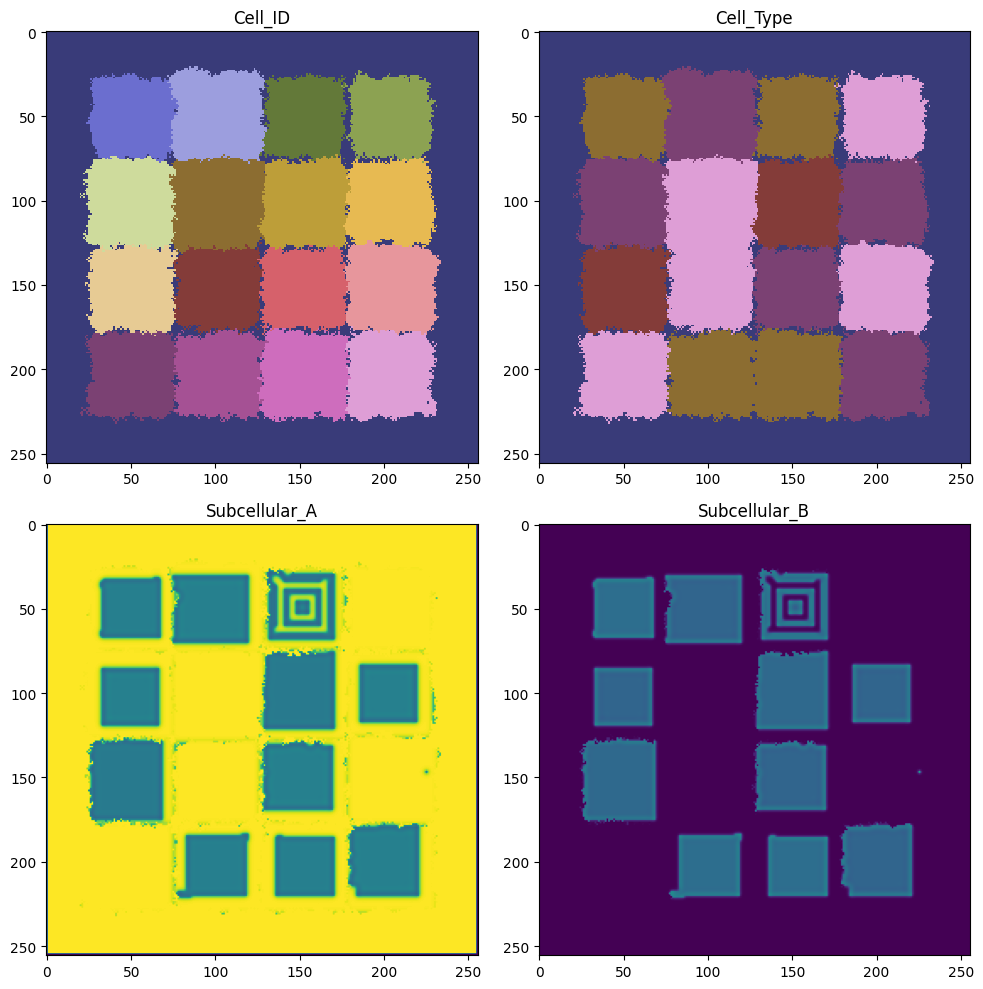

 24%|██▍       | 119/500 [03:23<09:30,  1.50s/it]

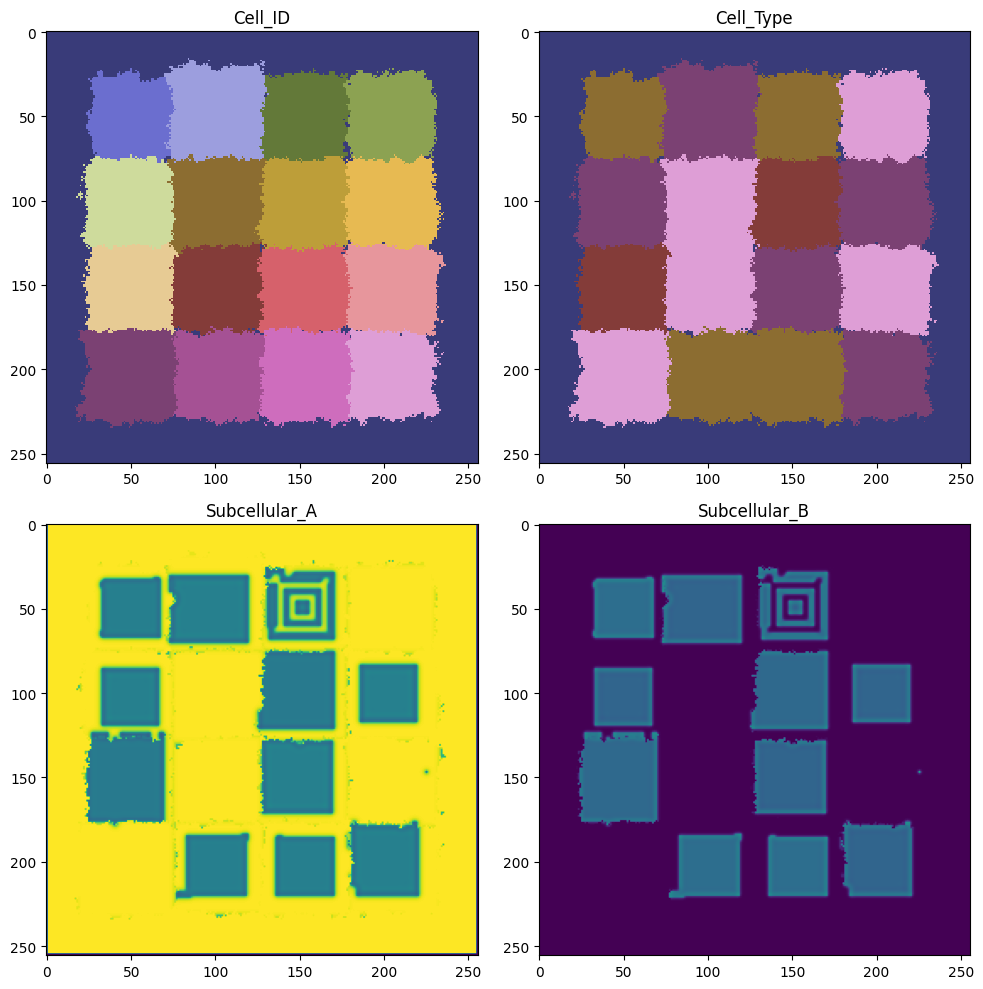

 30%|██▉       | 149/500 [04:18<07:34,  1.29s/it]

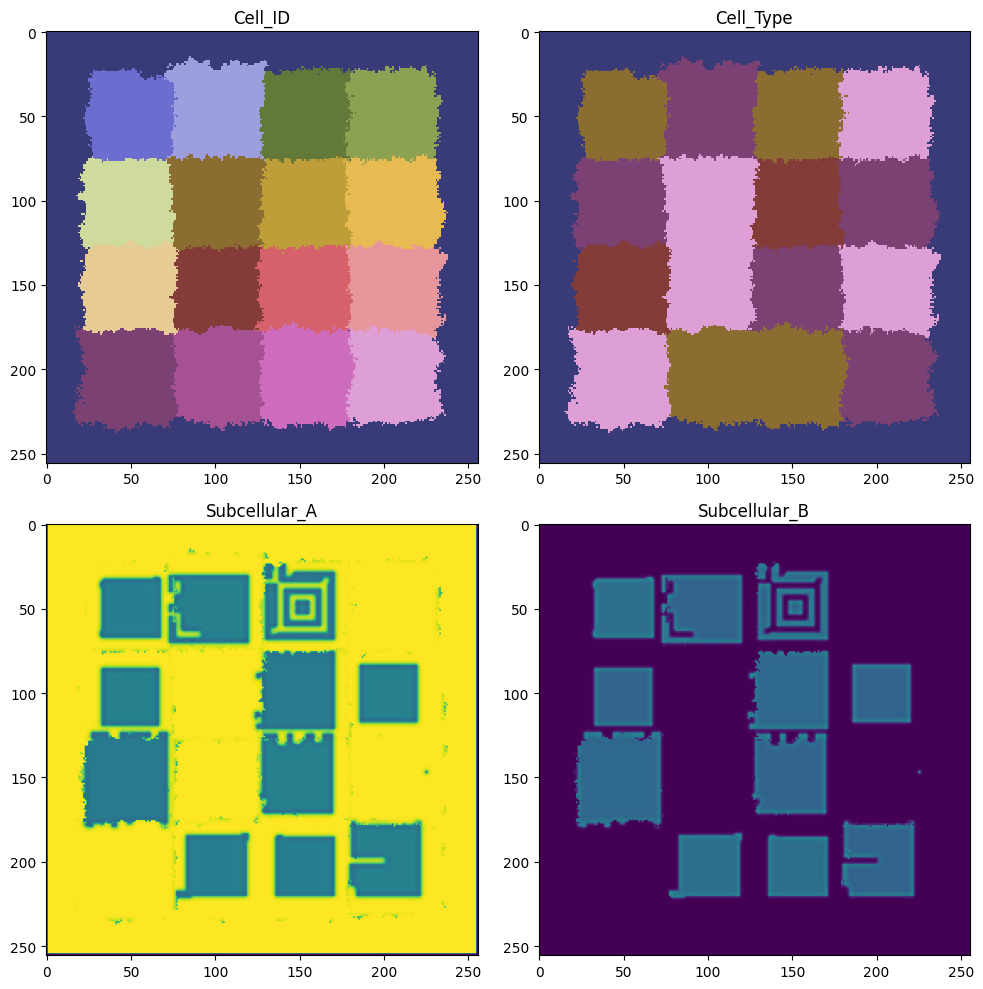

 36%|███▌      | 180/500 [05:18<06:44,  1.27s/it]

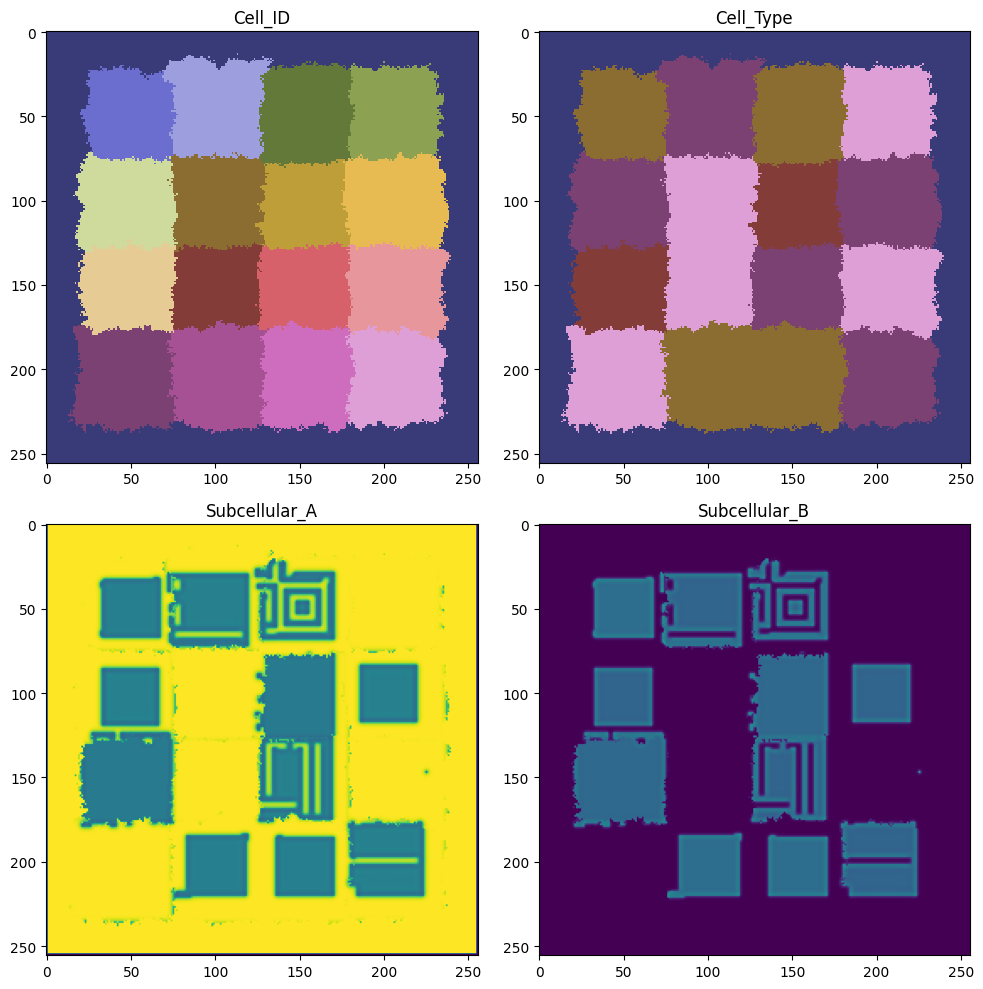

 37%|███▋      | 185/500 [05:33<09:28,  1.80s/it]


KeyboardInterrupt: 

In [9]:
for s, step in enumerate(simulation):
    if s % 30 == 0:
        cpm.plot_grid()
    